# Library Install


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn matplotlib wordcloud


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Importing the libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

# CSV File Import and dropping unnecessary columns


In [12]:
df = pd.read_csv("train.csv")
df.drop(columns=['id', 'keyword', 'location'], inplace=True)
df.head(10)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


# Dataset Visualization

In [14]:
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [15]:
df.head()
X=df['target']
df.groupby('target').describe().T

target                                                       0  \
text count                                                4342   
     unique                                               4315   
     top     The Prophet (peace be upon him) said 'Save you...   
     freq                                                    4   

target                                                       1  
text count                                                3271  
     unique                                               3206  
     top     11-Year-Old Boy Charged With Manslaughter of T...  
     freq                                                   10

Count of "Disaster": 3271
Count of "Not Disaster": 4342


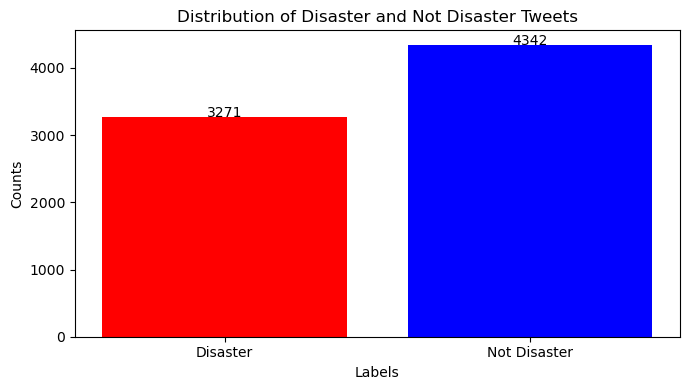

In [16]:
disaster_count = df['target'].eq(1).sum()
non_disaster_count = df['target'].eq(0).sum()

print(f'Count of "Disaster": {disaster_count}')
print(f'Count of "Not Disaster": {non_disaster_count}')

# Define labels and counts
labels = ["Disaster", "Not Disaster"]
counts = [disaster_count, non_disaster_count]

# Plotting the bar chart
plt.figure(figsize=(7, 4))
plt.bar(labels, counts, color=['red', 'blue'])

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Disaster and Not Disaster Tweets')

# Add text labels on top of the bars
for i, value in enumerate(counts):
    plt.text(i, value + 0.01, f'{value}', ha='center')

plt.tight_layout()
plt.show()

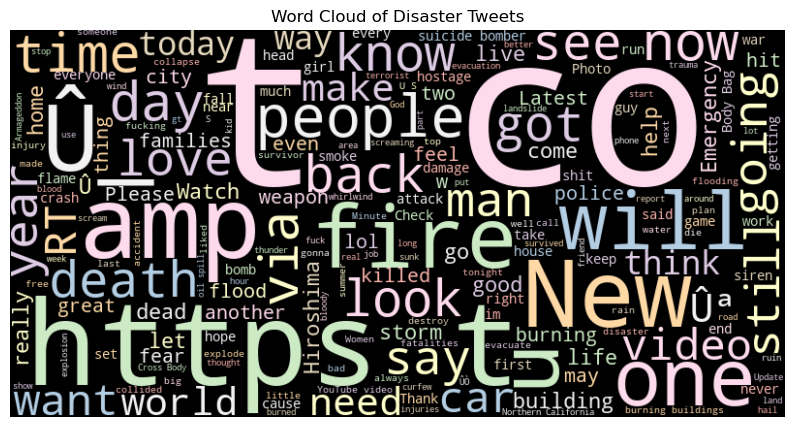

In [17]:
text_data = ' '.join(df['text'].astype(str))


wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1', max_words=200).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Disaster Tweets')
plt.show()

Max word count of disaster tweet: 30
Longest disaster tweet: "@OllyMursAus I do feel sorry for him! He is not a piece of meat! He is a nice guy... People don't need to rush him and screams in his face!"

Max word count of non-disaster tweet: 31
Longest non-disaster tweet: "If you have a son or a daughter would you like to see them going to a war with Iran and come back in a body bag? Let the #Republicans know"



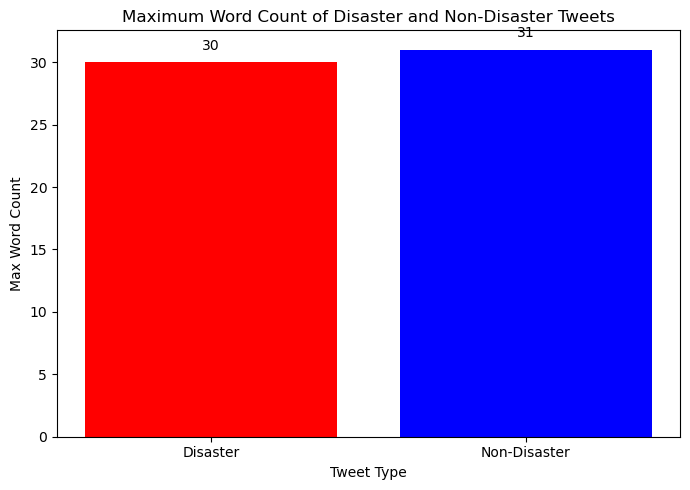

In [18]:
# Add a new column 'word_count' to calculate the number of words in each tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Find the maximum word count for disaster (target=1) and non-disaster (target=0)
max_disaster_word_count = df[df['target'] == 1]['word_count'].max()
max_non_disaster_word_count = df[df['target'] == 0]['word_count'].max()

# Find the tweet with the maximum word count for disaster (target=1)
longest_disaster_tweet = df[df['target'] == 1].loc[df['word_count'] == max_disaster_word_count, 'text'].values[0]

# Find the tweet with the maximum word count for non-disaster (target=0)
longest_non_disaster_tweet = df[df['target'] == 0].loc[df['word_count'] == max_non_disaster_word_count, 'text'].values[0]

# Print the maximum word counts and the longest tweets
print(f'Max word count of disaster tweet: {max_disaster_word_count}')
print(f'Longest disaster tweet: "{longest_disaster_tweet}"\n')
print(f'Max word count of non-disaster tweet: {max_non_disaster_word_count}')
print(f'Longest non-disaster tweet: "{longest_non_disaster_tweet}"\n')

# Define labels and maximum word counts
labels = ['Disaster', 'Non-Disaster']
max_word_counts = [max_disaster_word_count, max_non_disaster_word_count]

# Plot the bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, max_word_counts, color=['red', 'blue'])

plt.xlabel('Tweet Type')
plt.ylabel('Max Word Count')
plt.title('Maximum Word Count of Disaster and Non-Disaster Tweets')

# Add text labels on top of the bars
for i, value in enumerate(max_word_counts):
    plt.text(i, value + 1, f'{value}', ha='center')

plt.tight_layout()
plt.show()

# Dataset Random Split For Training and Testing

In [20]:
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=434)

# Unique word count find

In [22]:
import string

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)


unique_words = set()
for tweet in df['cleaned_text']:
    words = tweet.split()  # Tokenize (split into words)
    unique_words.update(words)  # Add words to the set


total_unique_word_count = len(unique_words)

print(f'Total Unique Word Count: {total_unique_word_count}')

Total Unique Word Count: 22697


# Tokenization Part

In [24]:
max_len = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' 
vocab_size = 22697

In [25]:
tokenizer = Tokenizer(num_words = vocab_size,
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [26]:
word_index = tokenizer.word_index
total_words = len(word_index)
print("Total words: ",total_words)

Total words:  21110


# Spliting the Train data for train and validation


In [28]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=434)

# Sequence and Padding for both train and test data


In [30]:
#train

training_sequences = tokenizer.texts_to_sequences(X_train_final)
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [31]:
#validation
validation_sequences = tokenizer.texts_to_sequences(X_val)
validation_padded = pad_sequences(validation_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [32]:
#for testing
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [33]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of validation tensor: ', validation_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (6165, 50)
Shape of validation tensor:  (686, 50)
Shape of testing tensor:  (762, 50)


# Glove Embedding import and apply

In [35]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the embeddings
glove_embeddings = load_glove_embeddings('glove.6B.300d.txt')

In [36]:
def create_embedding_matrix(glove_file, word_index, embedding_dim):
    # Initialize the embedding matrix with zeros
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))  # +1 for padding index

    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            if word in word_index:
                index = word_index[word]
                embedding_vector = np.array(values[1:], dtype='float32')
                if embedding_vector.shape[0] == embedding_dim:
                    embedding_matrix[index] = embedding_vector

    return embedding_matrix
    
embedding_dim = 300
# Create the embedding matrix
embedding_matrix = create_embedding_matrix('glove.6B.300d.txt', word_index, embedding_dim)

# Check shapes
print("Shape of embedding matrix:", embedding_matrix.shape)

Shape of embedding matrix: (21111, 300)


# First Model Bi-LSTM

In [38]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

n_lstm = 12  # Reduced LSTM units
drop_lstm = 0.7  # Increased dropout rate
max_len = 35  

model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,  # Use the size of word_index
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix],  
                    trainable=True))             

model.add(Bidirectional(LSTM(n_lstm, return_sequences=False, kernel_regularizer=l2(0.01))))
model.add(Dropout(drop_lstm))
model.add(Dense(1, activation='sigmoid'))

# Build the model (optional, but recommended to explicitly define input shape)
model.build(input_shape=(None, max_len))

# Compile the model
optimizer = Adam(learning_rate=0.00005) 
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 35, 300)        │     6,333,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 24)             │        30,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,363,373 (24.27 MB)

 Trainable params: 6,363,373 (24.27 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
num_epochs = 40
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(training_padded, 
                    y_train_final,  
                    epochs=num_epochs, 
                    validation_data=(validation_padded, y_val),  
                    callbacks=[early_stop], 
                    verbose=2)


Epoch 1/40
193/193 - 12s - 64ms/step - accuracy: 0.5521 - loss: 2.1775 - val_accuracy: 0.5889 - val_loss: 2.0170
Epoch 2/40
193/193 - 8s - 42ms/step - accuracy: 0.5958 - loss: 1.8960 - val_accuracy: 0.6181 - val_loss: 1.7624
Epoch 3/40
193/193 - 8s - 42ms/step - accuracy: 0.6232 - loss: 1.6634 - val_accuracy: 0.6633 - val_loss: 1.5480
Epoch 4/40
193/193 - 8s - 42ms/step - accuracy: 0.6571 - loss: 1.4643 - val_accuracy: 0.7201 - val_loss: 1.3658
Epoch 5/40
193/193 - 8s - 42ms/step - accuracy: 0.6843 - loss: 1.2972 - val_accuracy: 0.7478 - val_loss: 1.2106
Epoch 6/40
193/193 - 8s - 42ms/step - accuracy: 0.7165 - loss: 1.1544 - val_accuracy: 0.7726 - val_loss: 1.0785
Epoch 7/40
193/193 - 8s - 42ms/step - accuracy: 0.7314 - loss: 1.0352 - val_accuracy: 0.7784 - val_loss: 0.9676
Epoch 8/40
193/193 - 8s - 42ms/step - accuracy: 0.7572 - loss: 0.9335 - val_accuracy: 0.7843 - val_loss: 0.8751
Epoch 9/40
193/193 - 8s - 42ms/step - accuracy: 0.7703 - loss: 0.8484 - val_accuracy: 0.7901 - val_loss

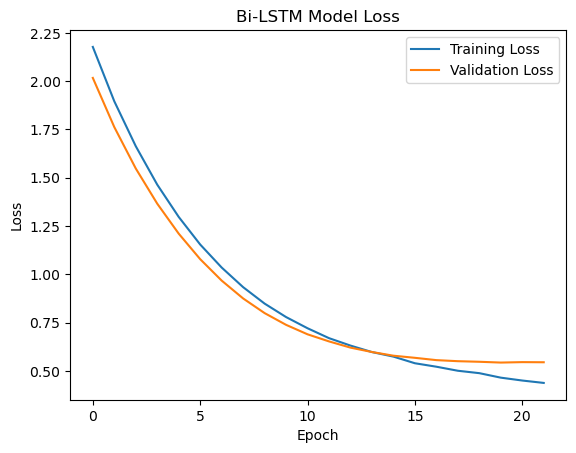

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Bi-LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [41]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(testing_padded, y_test, batch_size=128)  # Use y_test here
print("Test loss, test accuracy:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(testing_padded[:3])
print("Predictions shape:", predictions.shape)

# Display the actual prediction results for the first 3 samples
print("Predictions for the first 3 samples:", predictions)


Evaluate on test data
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8270 - loss: 0.5207 
Test loss, test accuracy: [0.5269492864608765, 0.817585289478302]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Predictions shape: (3, 1)
Predictions for the first 3 samples: [[0.9000632 ]
 [0.11813879]
 [0.08069674]]


# Confusion matrix, Precision score, Recall_score, F1_score

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


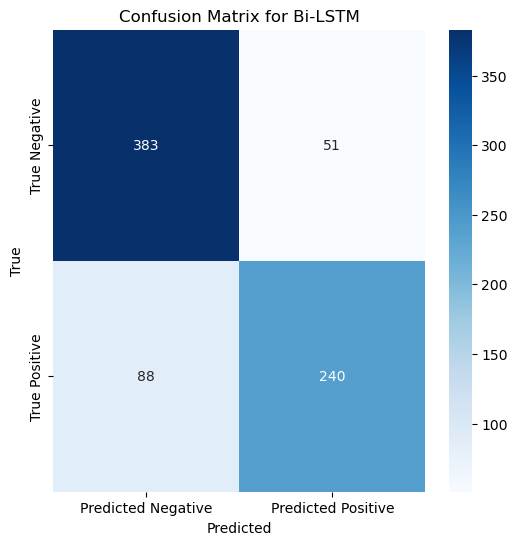

Bi-LSTM Precision: 0.8247422680412371
Bi-LSTM Recall: 0.7317073170731707
Bi-LSTM F1 Score: 0.7754


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score

# Generate predictions from the Bi-LSTM model
binary_data_bi_lstm = model.predict(testing_padded) > 0.5  # Convert probabilities to binary predictions

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["True Negative", "True Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Compute the confusion matrix for Bi-LSTM
cm_bi_lstm = confusion_matrix(y_test, binary_data_bi_lstm)
plot_confusion_matrix(cm_bi_lstm, "Confusion Matrix for Bi-LSTM")

# Calculate precision and recall for Bi-LSTM
precision_bi_lstm = precision_score(y_test, binary_data_bi_lstm)
recall_bi_lstm = recall_score(y_test, binary_data_bi_lstm)

print("Bi-LSTM Precision:", precision_bi_lstm)
print("Bi-LSTM Recall:", recall_bi_lstm)

f1_bi_lstm = f1_score(y_test, binary_data_bi_lstm)

print(f"Bi-LSTM F1 Score: {f1_bi_lstm:.4f}")


# Second Model Bi-GRU

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
n_gru = 12
drop_rate = 0.6  # Adjusted dropout rate
max_len = 35  

model2 = Sequential()

# Ensure vocab_size is correctly set
vocab_size = len(word_index) + 1  # This should be based on your tokenizer

# Add the embedding layer with GloVe embeddings
model2.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     weights=[embedding_matrix],  
                     trainable=True))             
model2.add(Bidirectional(GRU(n_gru, return_sequences=False, kernel_regularizer=l2(0.02))))
model2.add(Dropout(drop_rate))
model2.add(Dense(1, activation='sigmoid'))

# Build the model with the correct input shape
model2.build(input_shape=(None, max_len))

# Compile the model
optimizer = Adam(learning_rate=0.00005)  # Adjusted learning rate
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 35, 300)        │     6,333,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 24)             │        22,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,355,933 (24.25 MB)

 Trainable params: 6,355,933 (24.25 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
num_epochs = 40
early_stop = EarlyStopping(monitor='val_loss', patience=2)

history = model2.fit(training_padded, 
                    y_train_final,  
                    epochs=num_epochs, 
                    validation_data=(validation_padded, y_val),  
                    callbacks=[early_stop], 
                    verbose=2)




Epoch 1/40
193/193 - 13s - 67ms/step - accuracy: 0.5324 - loss: 3.0255 - val_accuracy: 0.5758 - val_loss: 2.7846
Epoch 2/40
193/193 - 8s - 44ms/step - accuracy: 0.6057 - loss: 2.5820 - val_accuracy: 0.6064 - val_loss: 2.3878
Epoch 3/40
193/193 - 8s - 44ms/step - accuracy: 0.6167 - loss: 2.2205 - val_accuracy: 0.6152 - val_loss: 2.0592
Epoch 4/40
193/193 - 8s - 44ms/step - accuracy: 0.6376 - loss: 1.9229 - val_accuracy: 0.6574 - val_loss: 1.7865
Epoch 5/40
193/193 - 8s - 44ms/step - accuracy: 0.6707 - loss: 1.6705 - val_accuracy: 0.6851 - val_loss: 1.5599
Epoch 6/40
193/193 - 9s - 44ms/step - accuracy: 0.6905 - loss: 1.4622 - val_accuracy: 0.7157 - val_loss: 1.3714
Epoch 7/40
193/193 - 8s - 43ms/step - accuracy: 0.7009 - loss: 1.2893 - val_accuracy: 0.7230 - val_loss: 1.2144
Epoch 8/40
193/193 - 8s - 43ms/step - accuracy: 0.7226 - loss: 1.1463 - val_accuracy: 0.7391 - val_loss: 1.0835
Epoch 9/40
193/193 - 8s - 43ms/step - accuracy: 0.7328 - loss: 1.0249 - val_accuracy: 0.7551 - val_loss

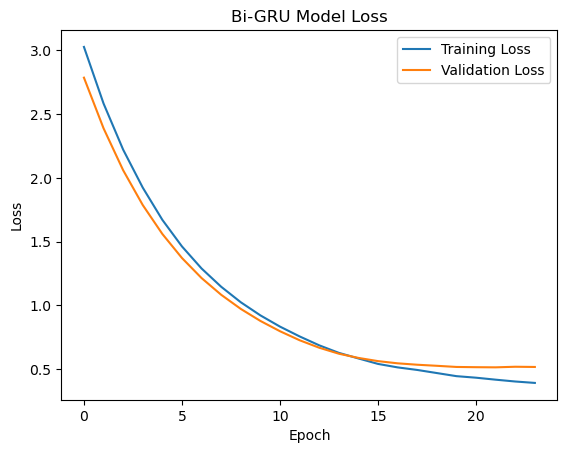

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Bi-GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [48]:

print("Evaluate on test data")
results = model2.evaluate(testing_padded, y_test, batch_size=128)
print("Test loss, test accuracy:", results)

print("Generate predictions for 3 samples")
predictions = model2.predict(testing_padded[:3])
print("Predictions shape:", predictions.shape)

print("Predictions for the first 3 samples:", predictions)


Evaluate on test data
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8393 - loss: 0.4557 
Test loss, test accuracy: [0.4667605757713318, 0.8385826945304871]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Predictions shape: (3, 1)
Predictions for the first 3 samples: [[0.91055465]
 [0.21335529]
 [0.05564135]]


# Confusion matrix, Precision score, Recall_score, F1_score

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


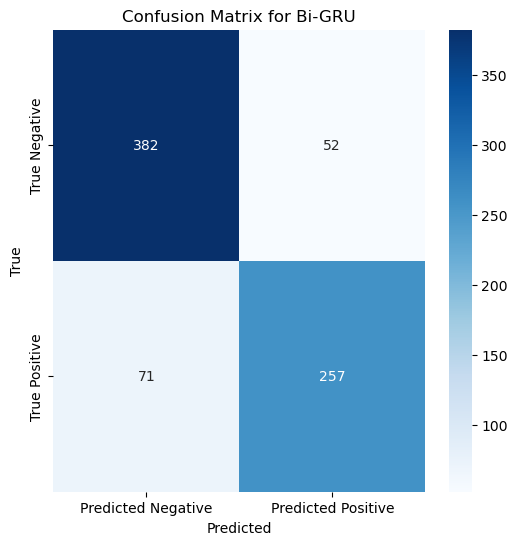

Bi-GRU Precision: 0.8317152103559871
Bi-GRU Recall: 0.7835365853658537
Bi-GRU F1 Score: 0.8069


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score

# Generate predictions from the Bi-GRU model
binary_data_bi_gru = model2.predict(testing_padded) > 0.5  # Convert probabilities to binary predictions

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["True Negative", "True Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Compute the confusion matrix for Bi-GRU
cm_bi_gru = confusion_matrix(y_test, binary_data_bi_gru)
plot_confusion_matrix(cm_bi_gru, "Confusion Matrix for Bi-GRU")

# Calculate precision and recall for Bi-GRU
precision_bi_gru = precision_score(y_test, binary_data_bi_gru)
recall_bi_gru = recall_score(y_test, binary_data_bi_gru)

print("Bi-GRU Precision:", precision_bi_gru)
print("Bi-GRU Recall:", recall_bi_gru)

# Calculate F1 and F2 scores for Bi-GRU
f1_bi_gru = f1_score(y_test, binary_data_bi_gru)


print(f"Bi-GRU F1 Score: {f1_bi_gru:.4f}")


# Comparison of accuracy for both model

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8325 - loss: 0.5135
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.4459


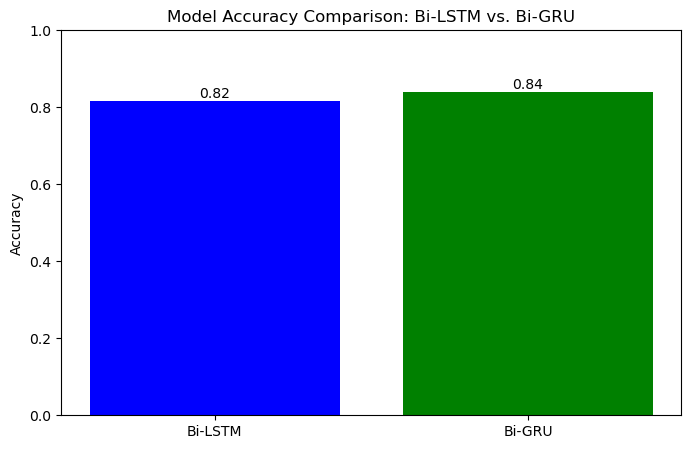

In [52]:
bi_lstm_loss, bi_lstm_accuracy = model.evaluate(testing_padded, y_test)
bi_gru_loss, bi_gru_accuracy = model2.evaluate(testing_padded, y_test)

# Data for the bar chart
models = ['Bi-LSTM', 'Bi-GRU']
accuracies = [bi_lstm_accuracy, bi_gru_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (accuracy range)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Bi-LSTM vs. Bi-GRU')

# Show accuracy values on top of the bars
for index, value in enumerate(accuracies):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()